In [232]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Function to make a simple stock graph
import plotly.subplots as sp
import plotly.graph_objects as go

# Function to make a simple stock graph
def make_graph(stock_data, revenue_data, stock):
    fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=stock_data_specific['Date'], y=stock_data_specific['Close'], mode='lines', name='Stock Price'), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], y=revenue_data_specific['Revenue'], mode='lines', name='Revenue', line=dict(color='orange')), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_layout(title_text=stock, showlegend=True)
    fig.show()

In [233]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Question 1 - Extracting Tesla Stock Data Using yfinance (TSLA)

In [234]:
tesla = yf.Ticker("TSLA")

In [235]:
tesla_data = tesla.history(period="max")

In [236]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [237]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

In [238]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

In [239]:
tesla_revenue = pd.read_html(str(soup.find_all("table")[1]))[0]
tesla_revenue.columns = ['Date', 'Revenue']

In [240]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

In [241]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [242]:
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3 - Extracting Tesla Stock Data Using yfinance (GME)

In [243]:
gme = yf.Ticker("GME")

In [244]:
gme_data = gme.history(period="max")

In [245]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [246]:
import requests
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_gme = requests.get(url_gme)
html_data_gme = response_gme.text

In [247]:
from bs4 import BeautifulSoup
soup_gme = BeautifulSoup(html_data_gme, 'html.parser')

In [248]:
gme_revenue = pd.read_html(str(soup_gme.find_all("table")[1]))[0]
gme_revenue.columns = ['Date', 'Revenue']

In [249]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)

In [250]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph

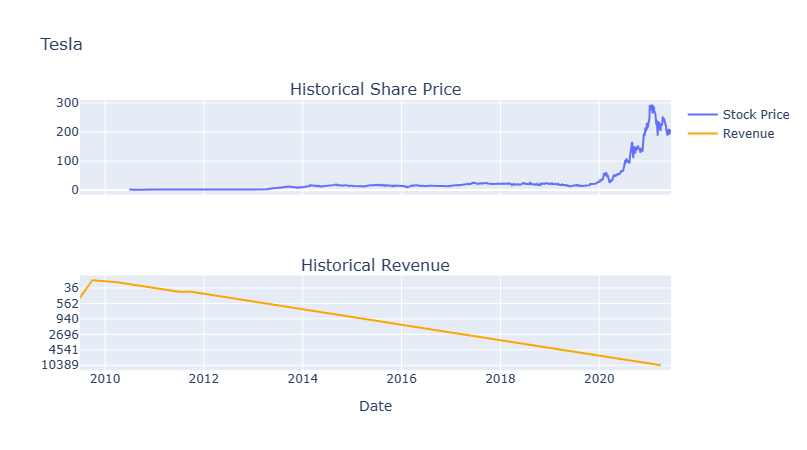

In [251]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph

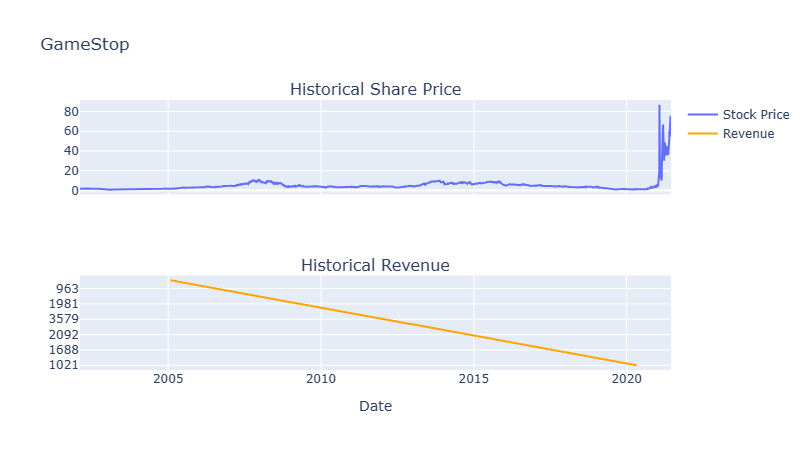

In [252]:
make_graph(gme_data, gme_revenue, 'GameStop')